<a href="https://www.kaggle.com/code/arkabarua173/clustering-of-coffee-quality?scriptVersionId=172017911" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# !pip install plotly==5.20.0

# Importing Libraries

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
import warnings

warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-quality-with-locations-of-origin/Coffee_Qlty_By_Continent.csv
/kaggle/input/coffee-quality-with-locations-of-origin/Coffee_Qlty_By_Country.csv
/kaggle/input/coffee-quality-with-locations-of-origin/Coffee_Qlty.csv


# Loading Dataset

In [3]:
data_path = '/kaggle/input/coffee-quality-with-locations-of-origin/Coffee_Qlty.csv'
df = pd.read_csv(data_path)
df.head()

,REC_ID,Species,Continent.of.Origin,Country.of.Origin,Harvest.Year,Expiration,Variety,Color,Processing.Method,Aroma,...,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Quakers,Category.One.Defects,Category.Two.Defects
0,0,Arabica,Africa,Ethiopia,2014.0,04/03/16,NaN,Green,Washed / Wet,8.67,...,8.75,8.50,8.42,10.0,10.0,10.0,0.12,0,0,0
1,1,Arabica,Africa,Ethiopia,2014.0,04/03/16,Other,Green,Washed / Wet,8.75,...,8.58,8.42,8.42,10.0,10.0,10.0,0.12,0,0,1
2,2,Arabica,North America,Guatemala,NaN,05/31/11,Bourbon,NaN,NaN,8.42,...,8.42,8.33,8.42,10.0,10.0,10.0,0.00,0,0,0
3,3,Arabica,Africa,Ethiopia,2014.0,03/25/16,NaN,Green,Natural / Dry,8.17,...,8.42,8.50,8.25,10.0,10.0,10.0,0.11,0,0,2
4,4,Arabica,Africa,Ethiopia,2014.0,04/03/16,Other,Green,Washed / Wet,8.25,...,8.50,8.42,8.33,10.0,10.0,10.0,0.12,0,0,2


# EDA

In [4]:
df.shape

(1339, 22)

In [5]:
df.columns

Index(['REC_ID', 'Species', 'Continent.of.Origin', 'Country.of.Origin',
       'Harvest.Year', 'Expiration', 'Variety', 'Color', 'Processing.Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean.Cup', 'Sweetness', 'Moisture', 'Quakers',
       'Category.One.Defects', 'Category.Two.Defects'],
      dtype='object')

In [6]:
df.dtypes

REC_ID                    int64
Species                  object
Continent.of.Origin      object
Country.of.Origin        object
Harvest.Year            float64
Expiration               object
Variety                  object
Color                    object
Processing.Method        object
Aroma                   float64
Flavor                  float64
Aftertaste              float64
Acidity                 float64
Body                    float64
Balance                 float64
Uniformity              float64
Clean.Cup               float64
Sweetness               float64
Moisture                float64
Quakers                   int64
Category.One.Defects      int64
Category.Two.Defects      int64
dtype: object

In [7]:
df.isna().sum()

REC_ID                    0
Species                   0
Continent.of.Origin       1
Country.of.Origin         1
Harvest.Year             60
Expiration                0
Variety                 226
Color                   270
Processing.Method       170
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean.Cup                 0
Sweetness                 0
Moisture                  0
Quakers                   0
Category.One.Defects      0
Category.Two.Defects      0
dtype: int64

***Key Observations***
- There are 1 missing values for Continent and Country each.
- A good chunk of missing values for Variety, Color, Processing.Method and Hervest year.

In [8]:
df[df[['Continent.of.Origin', 'Country.of.Origin']].isnull().any(axis=1)]

,REC_ID,Species,Continent.of.Origin,Country.of.Origin,Harvest.Year,Expiration,Variety,Color,Processing.Method,Aroma,...,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Quakers,Category.One.Defects,Category.Two.Defects
1197,1197,Arabica,NaN,NaN,NaN,02/29/12,NaN,NaN,NaN,6.75,...,6.83,7.58,7.5,10.0,10.0,10.0,0.1,0,0,3


In [9]:
df.drop(df[df['REC_ID'] == 1197].index, inplace=True)

***We can drop this row since it has a lot of info missing besides country and continent.***

In [10]:
df.iloc[1195:1198]

,REC_ID,Species,Continent.of.Origin,Country.of.Origin,Harvest.Year,Expiration,Variety,Color,Processing.Method,Aroma,...,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Quakers,Category.One.Defects,Category.Two.Defects
1195,1195,Arabica,North America,Mexico,2012.0,09/12/13,Mundo Novo,Green,Washed / Wet,7.25,...,7.33,7.42,7.00,9.33,10.00,10.0,0.11,0,0,45
1196,1196,Arabica,North America,Mexico,2012.0,07/03/13,Typica,Bluish-Green,Washed / Wet,7.17,...,7.17,7.25,7.08,9.33,9.33,10.0,0.10,0,0,0
1198,1198,Arabica,North America,Guatemala,2014.0,09/11/15,Other,Green,Washed / Wet,7.33,...,7.42,7.08,6.83,10.00,10.00,10.0,0.12,0,0,3


***We will remove the REC_ID becasue it is the same as index***

In [11]:
df.drop(columns=['REC_ID'], inplace=True)

In [12]:
df.reset_index(drop=True, inplace=True)

In [13]:
df.iloc[1195:1198]

,Species,Continent.of.Origin,Country.of.Origin,Harvest.Year,Expiration,Variety,Color,Processing.Method,Aroma,Flavor,...,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Quakers,Category.One.Defects,Category.Two.Defects
1195,Arabica,North America,Mexico,2012.0,09/12/13,Mundo Novo,Green,Washed / Wet,7.25,7.08,...,7.33,7.42,7.00,9.33,10.00,10.0,0.11,0,0,45
1196,Arabica,North America,Mexico,2012.0,07/03/13,Typica,Bluish-Green,Washed / Wet,7.17,7.25,...,7.17,7.25,7.08,9.33,9.33,10.0,0.10,0,0,0
1197,Arabica,North America,Guatemala,2014.0,09/11/15,Other,Green,Washed / Wet,7.33,7.17,...,7.42,7.08,6.83,10.00,10.00,10.0,0.12,0,0,3


In [14]:
df.describe()

,Harvest.Year,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Quakers,Category.One.Defects,Category.Two.Defects
count,1279.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,2013.567631,7.567317,7.521001,7.401816,7.536233,7.517451,7.518027,9.834753,9.834985,9.856584,0.088371,0.173393,0.479821,3.556801
std,1.808496,0.377040,0.398033,0.403723,0.379478,0.370198,0.409096,0.554780,0.764218,0.616320,0.048304,0.832121,2.550603,5.314505
min,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,0.090000,0.000000,0.000000,0.000000
50%,2013.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,0.110000,0.000000,0.000000,2.000000
75%,2015.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,0.120000,0.000000,0.000000,4.000000
max,2018.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,0.280000,11.000000,63.000000,55.000000


In [15]:
df.duplicated().sum()

1

In [16]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [17]:
df_object = df.select_dtypes(exclude='object')
df_object.columns

Index(['Harvest.Year', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Moisture',
       'Quakers', 'Category.One.Defects', 'Category.Two.Defects'],
      dtype='object')

In [18]:
df_object = df.select_dtypes(include='object')
df_object.head()

,Species,Continent.of.Origin,Country.of.Origin,Expiration,Variety,Color,Processing.Method
0,Arabica,Africa,Ethiopia,04/03/16,NaN,Green,Washed / Wet
1,Arabica,Africa,Ethiopia,04/03/16,Other,Green,Washed / Wet
2,Arabica,North America,Guatemala,05/31/11,Bourbon,NaN,NaN
3,Arabica,Africa,Ethiopia,03/25/16,NaN,Green,Natural / Dry
4,Arabica,Africa,Ethiopia,04/03/16,Other,Green,Washed / Wet


In [19]:
df_object.Species.value_counts()

Species
Arabica    1309
Robusta      28
Name: count, dtype: int64

In [20]:
df_object['Continent.of.Origin'].value_counts()

Continent.of.Origin
North America    665
South America    328
Asia             181
Africa           162
Oceania            1
Name: count, dtype: int64

In [21]:
df_object['Country.of.Origin'].value_counts()

Country.of.Origin
Mexico              236
Colombia            183
Guatemala           181
Brazil              132
United States        87
Taiwan               74
Honduras             53
Costa Rica           51
Ethiopia             44
Tanzania             40
Uganda               36
Thailand             32
Nicaragua            26
Kenya                25
El Salvador          21
Indonesia            20
China                16
India                14
Malawi               11
Peru                 10
Vietnam               8
Myanmar               8
Haiti                 6
Philippines           5
Panama                4
Ecuador               3
Laos                  3
Burundi               2
Papua New Guinea      1
Japan                 1
Rwanda                1
Zambia                1
Mauritius             1
Cote dIvoire          1
Name: count, dtype: int64

In [22]:
df['Expiration'].head()

0    04/03/16
1    04/03/16
2    05/31/11
3    03/25/16
4    04/03/16
Name: Expiration, dtype: object

***Changing Expiration column data types of date type***

In [23]:
df['Expiration']= pd.to_datetime(df['Expiration'], format="%m/%d/%y")

In [24]:
df['Expiration_year'] = df['Expiration'].dt.year

In [25]:
df[['Expiration', 'Expiration_year']].head()

,Expiration,Expiration_year
0,2016-04-03,2016
1,2016-04-03,2016
2,2011-05-31,2011
3,2016-03-25,2016
4,2016-04-03,2016


In [26]:
df.drop(columns=['Expiration'], inplace=True)

In [27]:
features = df.select_dtypes(exclude='object')
features.head()

,Harvest.Year,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Quakers,Category.One.Defects,Category.Two.Defects,Expiration_year
0,2014.0,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,0.12,0,0,0,2016
1,2014.0,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,0.12,0,0,1,2016
2,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,0.00,0,0,0,2011
3,2014.0,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,0.11,0,0,2,2016
4,2014.0,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,0.12,0,0,2,2016


In [28]:
df['Harvest.Year'].describe()

count    1278.000000
mean     2013.568075
std         1.809134
min      2009.000000
25%      2012.000000
50%      2013.000000
75%      2015.000000
max      2018.000000
Name: Harvest.Year, dtype: float64

In [29]:
df['Harvest.Year'].value_counts()

Harvest.Year
2012.0    354
2014.0    252
2013.0    209
2015.0    157
2016.0    131
2017.0     89
2011.0     35
2010.0     30
2009.0     20
2018.0      1
Name: count, dtype: int64

In [30]:
fig = px.histogram(df, x="Harvest.Year",  marginal="box",
                         hover_data=df.columns)
fig.show()

# Data Viz

In [31]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Histogram(x=df['Expiration_year'], name='Expiration_year'), row=1, col=1)
fig.add_trace(go.Histogram(x=df['Harvest.Year'], name='Harvest.Year'), row=1, col=2)

In [32]:
columns_to_group = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 
                    'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 
                    'Moisture', 'Quakers', 'Category.One.Defects', 'Category.Two.Defects']

custom_ylabels = {
    'Aroma': 'Average scent or fragrance of the coffee',
    'Flavor': 'Average Flavor',
    'Aftertaste': 'Average Aftertaste',
    'Acidity': 'Average brightness or liveliness of the taste',
    'Body': 'Average thickness or viscosity of the coffee in the mouth',
    'Balance': 'Average Balance',
    'Uniformity': 'Average consistency of the coffee from cup to cup',
    'Clean.Cup': 'Average off-flavors or defects free',
    'Sweetness': 'Average sweetness offered by its taste',
    'Moisture': 'Average moisture content of the coffee beans',
    'Quakers': 'Average presence of quaker beans',
    'Category.One.Defects': 'Average #1 Defects (black or sour beans)',
    'Category.Two.Defects': 'Average #2 Defects (moldy, insect-damaged, or perforated beans)'
}

columns_to_group = list(custom_ylabels.keys())

# Creating plots for each column
for column in columns_to_group:
    average_column = df.groupby('Country.of.Origin')[column].mean().reset_index()
    sorted_column_df = average_column.sort_values(by=column, ascending=False)
    fig = px.bar(sorted_column_df, x='Country.of.Origin', y=column,
                 labels={'Country.of.Origin': 'Country', column: custom_ylabels[column]},
                 title=f'Average {column} by Country')
    fig.update_xaxes(tickangle=90, tickfont=dict(family='Arial Black'))
    fig.update_layout(title=dict(x=0.5))
    fig.show()

In [33]:
fig = px.scatter_matrix(df,
    dimensions=['Clean.Cup', 'Quakers', 'Aftertaste', 'Balance', 
                     'Category.One.Defects', 'Category.Two.Defects'],
    color="Species")

title = "Scatterplot Matrix"
fig.update_layout(title=title,
                  dragmode='select',
                  width=1200,
                  height=800,
                  hovermode='closest')
fig.show()

# Data Preprocessing

In [34]:
from sklearn.impute import SimpleImputer

numeric_imputer = SimpleImputer(missing_values=np.nan, strategy='mean').set_output(transform='pandas')
features = numeric_imputer.fit_transform(features)

In [35]:
features.isna().sum()

Harvest.Year            0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Moisture                0
Quakers                 0
Category.One.Defects    0
Category.Two.Defects    0
Expiration_year         0
dtype: int64

In [36]:
features.head()

,Harvest.Year,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Quakers,Category.One.Defects,Category.Two.Defects,Expiration_year
0,2014.000000,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,0.12,0.0,0.0,0.0,2016.0
1,2014.000000,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,0.12,0.0,0.0,1.0,2016.0
2,2013.568075,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,0.00,0.0,0.0,0.0,2011.0
3,2014.000000,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,0.11,0.0,0.0,2.0,2016.0
4,2014.000000,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,0.12,0.0,0.0,2.0,2016.0


In [37]:
from sklearn.decomposition import PCA

pca = PCA().fit(features)

In [38]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
exp_var_cumul

array([0.65115835, 0.79772344, 0.93141649, 0.95597057, 0.96993497,
       0.97971569, 0.98696643, 0.99240853, 0.99609524, 0.99725752,
       0.99812878, 0.99895744, 0.99960136, 0.99995326, 1.        ])

In [39]:
fig = px.line(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "Number of Components", "y": "Cumulative Explained Variance"},
    title="Explained Variance by Components",
    markers=True
)

fig.update_traces(line=dict(dash='dash'))

fig.show()

***We will choose 3 components as they capture almost 93% of the total variance***

In [40]:
pca = PCA(n_components=3).set_output(transform='pandas')
pca_3 = pca.fit_transform(features)
pca_3

,pca0,pca1,pca2
0,-3.748306,-0.871256,0.195391
1,-2.757287,-0.964273,0.055701
2,-3.482149,3.005124,-0.534937
3,-1.760300,-1.062294,-0.077578
4,-1.758593,-1.062677,-0.077195
...,...,...,...
1332,-2.793043,-3.062179,0.596012
1333,-3.753447,-2.998926,0.730418
1334,2.349177,-0.742802,-0.605376
1335,0.611811,3.809303,19.436639


# K-means Clustering

In [41]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans_pca.fit(pca_3)
    wcss.append(kmeans_pca.inertia_)

In [42]:
fig = px.line(
    x=range(1, 21),
    y=wcss,
    labels={"x": "Number of Clusters", "y": "WCSS"},
    title="KMeans with PCA Clustering",
    markers=True,
    line_shape="linear"
)

fig.show()

- ***We can see that after cluster 6 inertia starts decreasing in a linear fashion.***
- ***AWe will choose 6 as optimal number of clusters.***

In [43]:
kmeans_pca = KMeans(n_clusters = 6, init = 'k-means++', random_state=42)
kmeans_pca.fit(pca_3)

KMeans(n_clusters=6, random_state=42)

In [44]:
selected_df = df.select_dtypes(include='object')
segmented_kmeans_pca = pd.concat([selected_df.reset_index(drop=True), pca_3], axis=1)
new_column_names = ["Component_" + str(i+1) for i in range(3)]
segmented_kmeans_pca.columns.values[-3:] = new_column_names
segmented_kmeans_pca['K-means_labels'] = kmeans_pca.labels_
segmented_kmeans_pca.head()

,Species,Continent.of.Origin,Country.of.Origin,Variety,Color,Processing.Method,Component_1,Component_2,Component_3,K-means_labels
0,Arabica,Africa,Ethiopia,NaN,Green,Washed / Wet,-3.748306,-0.871256,0.195391,0
1,Arabica,Africa,Ethiopia,Other,Green,Washed / Wet,-2.757287,-0.964273,0.055701,0
2,Arabica,North America,Guatemala,Bourbon,NaN,NaN,-3.482149,3.005124,-0.534937,4
3,Arabica,Africa,Ethiopia,NaN,Green,Natural / Dry,-1.760300,-1.062294,-0.077578,0
4,Arabica,Africa,Ethiopia,Other,Green,Washed / Wet,-1.758593,-1.062677,-0.077195,0


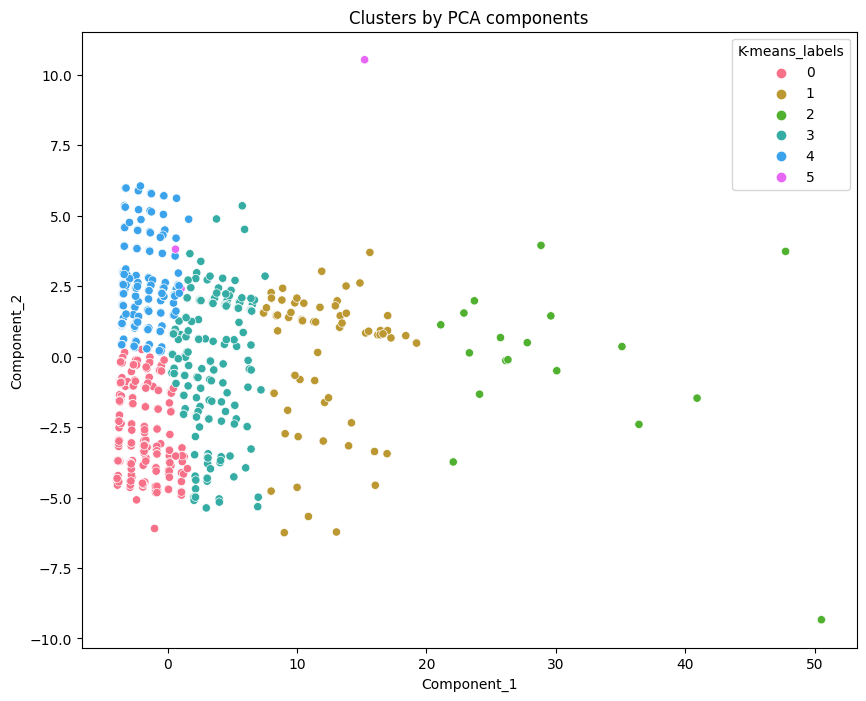

In [45]:
palette = sns.color_palette("husl", 6)

plt.figure(figsize=(10, 8))
sns.scatterplot(segmented_kmeans_pca, x="Component_1", y="Component_2", hue='K-means_labels', palette = palette)
plt.title('Clusters by PCA components')
plt.show()

In [46]:
palette = px.colors.qualitative.Plotly

# Plot the scatter plot with the specified palette
fig = px.scatter_3d(segmented_kmeans_pca, x="Component_1", y="Component_2", z="Component_3",
                    color='K-means_labels', color_discrete_sequence=palette[:6])

fig.update_layout(title='Clusters by PCA components')
fig.show()